In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#Import the 'accounts_data_merged' file (created in Data_Exploration) as a Pandas dataframe
accounts_df = pd.read_csv('accounts_data_merged.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
accounts_df.head()

,account,date,amount,count
0,5e0a5eb5575517efdddb2799c90e2e9b,2017-08-16,15.144020,56.0
1,ff6cc8cadcb7457f9ddb2dd238a13733,2017-08-16,3651.412248,432.0
2,324a05f1f917b8a0af83a54e55a1ef63,2017-08-16,113.219243,50.0
3,b9abff45dc08172b556cb10b7c3c2252,2017-08-16,697.224210,135.0
4,e6ff738c8dd54092b5b1de683fc71dc0,2017-08-16,41.867847,76.0


# 6) How are accounts distributed by average transaction size?

In [3]:
#Summarize the data by grouping unique accounts and averaging other data
accounts_grouped = accounts_df.groupby('account').mean()
accounts_grouped.head()

,amount,count
account,,
00023fda963eb48839a670cbdf74cd21,261.876970,16.363636
000458145e8ff76fb2907417d806d098,152.247424,23.611111
000b2159adf33dcb44291291e0575122,678.304469,219.000000
000cff3bf5b20e8bb5734eb0aeef6673,360.439931,65.187629
000f6054933c882efb96bc34b91c8924,77.269310,22.120000


In [4]:
#Rename the columns to reflect that they are averages
accounts_grouped = accounts_grouped.rename(columns={'amount': 'avg_amount', 'count': 'avg_count'})
accounts_grouped.head()

,avg_amount,avg_count
account,,
00023fda963eb48839a670cbdf74cd21,261.876970,16.363636
000458145e8ff76fb2907417d806d098,152.247424,23.611111
000b2159adf33dcb44291291e0575122,678.304469,219.000000
000cff3bf5b20e8bb5734eb0aeef6673,360.439931,65.187629
000f6054933c882efb96bc34b91c8924,77.269310,22.120000


Text(0.5, 1.0, 'Distribution of Accounts by Avg Transaction Size')

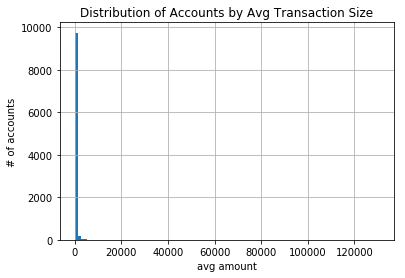

In [5]:
#Use a histogram to see the avg_amount distribution
accounts_grouped.hist(column='avg_amount', bins=100)
plt.xlabel('avg amount')
plt.ylabel('# of accounts')
plt.title('Distribution of Accounts by Avg Transaction Size')

In [6]:
#What is the size of each decile?
first_decile = accounts_grouped['avg_amount'].max()/10
first_decile

13061.376060047765

In [11]:
first_percentile = first_decile/10
first_percentile

1306.1376060047764

In [7]:
total_accounts = accounts_grouped['avg_amount'].count()
total_accounts

9999

In [8]:
#What percent of accounts are in the 1st decile?
f"{((total_accounts)-(accounts_grouped['avg_amount']>first_decile).sum())/total_accounts}% of accounts are in the first decile" 

'0.9986998699869987% of accounts are in the first decile'

In [19]:
#What percent of accounts are in the 1st percentile?
f"{((total_accounts)-(accounts_grouped['avg_amount']>first_percentile).sum())/total_accounts}% of accounts are in the first percentile" 

'0.9736973697369737% of accounts are in the first percentile'

# 7)	How are accounts distributed by their largest ever single month volume?

In [28]:
#Convert the 10 digit unix date to datetime in the df, then preview the result
accounts_df['date'] = pd.to_datetime(accounts_df['date'])
accounts_df.dtypes

account            object
date       datetime64[ns]
amount            float64
count             float64
dtype: object

In [32]:
#Create a 'month' column we can use to efficiently summarize
accounts_df['month'] = accounts_df['date'].dt.strftime('%b-%y')
accounts_df.head()

,account,date,amount,count,month
0,5e0a5eb5575517efdddb2799c90e2e9b,2017-08-16,15.144020,56.0,Aug-17
1,ff6cc8cadcb7457f9ddb2dd238a13733,2017-08-16,3651.412248,432.0,Aug-17
2,324a05f1f917b8a0af83a54e55a1ef63,2017-08-16,113.219243,50.0,Aug-17
3,b9abff45dc08172b556cb10b7c3c2252,2017-08-16,697.224210,135.0,Aug-17
4,e6ff738c8dd54092b5b1de683fc71dc0,2017-08-16,41.867847,76.0,Aug-17


In [57]:
#Use groupbys to get the volume of each account's highest volume month ever
monthly_sum = accounts_df.groupby(['account', 'month']).sum()
max_month = monthly_sum.groupby(['account']).max()

#Rename the columns to reflect their summary nature
max_month = max_month.rename(columns={'amount': 'max_month_amt', 'count': 'max_month_ct'})

max_month.head()

,max_month_amt,max_month_ct
account,,
00023fda963eb48839a670cbdf74cd21,5007.873493,210.0
000458145e8ff76fb2907417d806d098,4670.916987,459.0
000b2159adf33dcb44291291e0575122,19339.777019,6132.0
000cff3bf5b20e8bb5734eb0aeef6673,17029.032918,3104.0
000f6054933c882efb96bc34b91c8924,2417.231867,560.0


Text(0.5, 1.0, 'Distribution of Accounts by Max Monthly Volume')

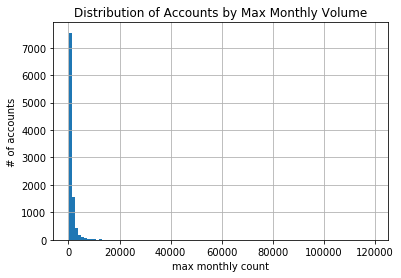

In [63]:
#Use a histogram to see the max monthly count distribution
max_month.hist(column='max_month_ct', bins=100)
plt.xlabel('max monthly count')
plt.ylabel('# of accounts')
plt.title('Distribution of Accounts by Max Monthly Volume')

In [69]:
#What is the size of each decile?
first_decile2 = max_month['max_month_ct'].max()/10
first_percentile2 = first_decile2/10

In [70]:
#What percent of accounts are in the 1st decile?
f"{((total_accounts)-(max_month['max_month_ct']>first_decile).sum())/total_accounts}% of accounts are in the first decile" 

'0.995099509950995% of accounts are in the first decile'

In [71]:
#What percent of accounts are in the 1st percentile?
f"{((total_accounts)-(max_month['max_month_ct']>first_percentile).sum())/total_accounts}% of accounts are in the first percentile" 

'0.7711771177117712% of accounts are in the first percentile'

In [95]:
#What percent of accounts have a max monthly volume of less than 1,000?
f"{((total_accounts)-(max_month['max_month_ct']>1000).sum())/total_accounts}%" 

'0.6671667166716672%'